<a href="https://colab.research.google.com/github/fMurugi/complete-neural-network-course/blob/main/Visualizelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
x,y = sklearn.datasets.make_moons(200,noise=0.20)

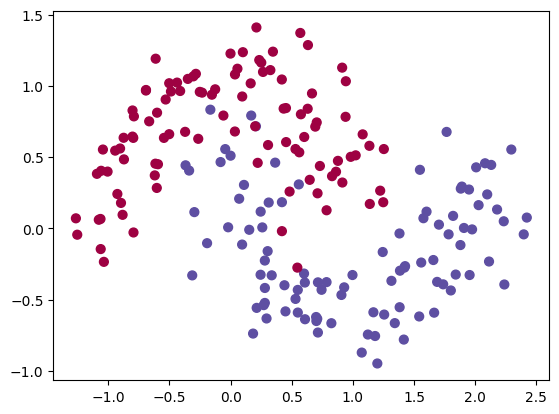

In [4]:
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.show()

In [5]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [10]:
class FeedForward(torch.nn.Module):
  def __init__(self,input_neurons,hidden_neurons,output_neurons):
    super(FeedForward,self).__init__()
    self.hidden = nn.Linear(input_neurons, hidden_neurons)
    self.out = nn.Linear(hidden_neurons, output_neurons)

  def forward(self,x):
    x = F.relu(self.hidden(x))
    x = self.out(x)
    return  x


In [11]:
net = FeedForward(2,50,2)
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
criterion = torch.nn.CrossEntropyLoss() #using ce because we have 2 output neurons

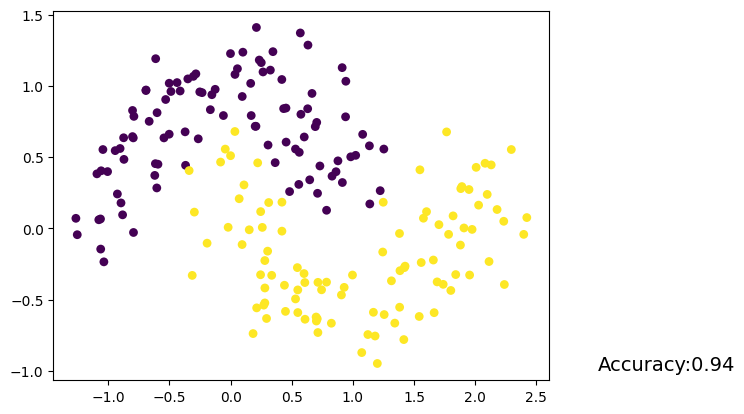

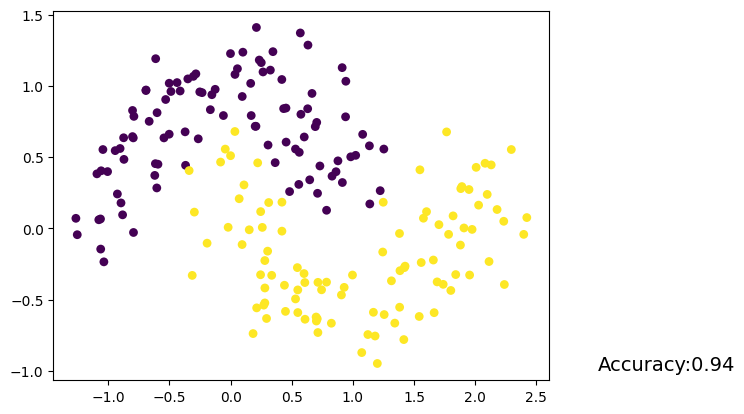

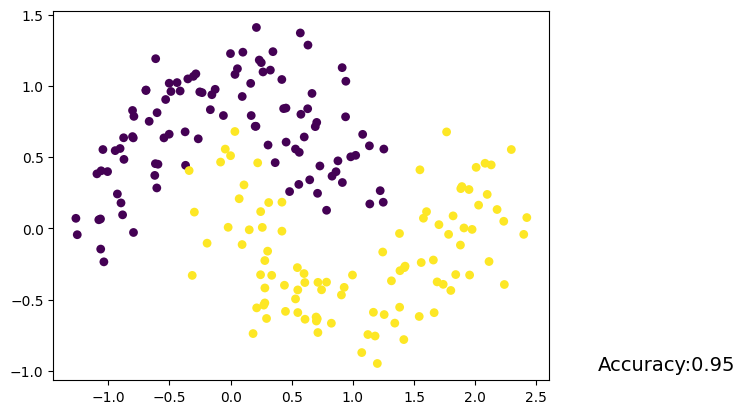

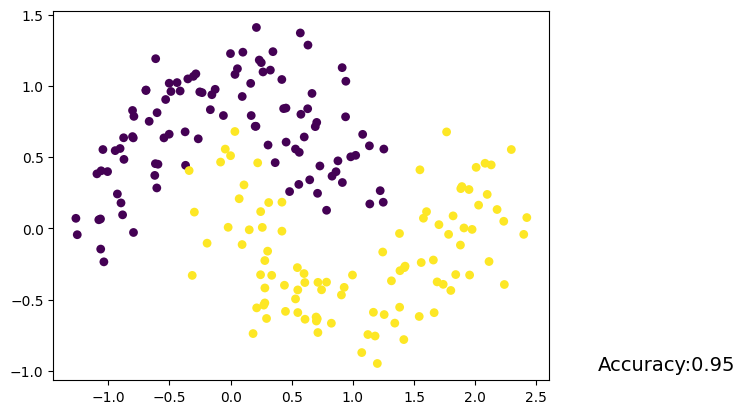

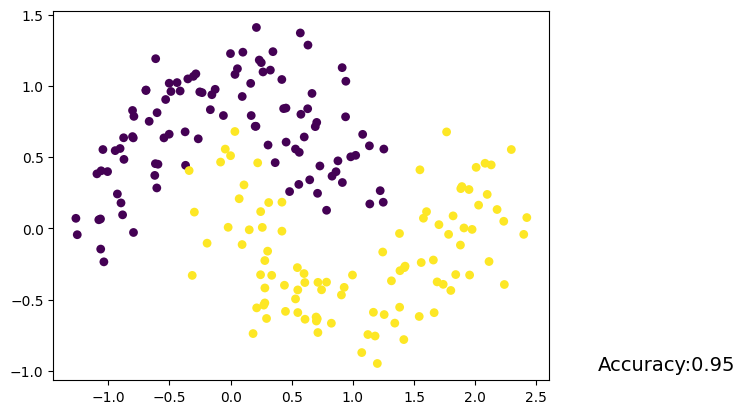

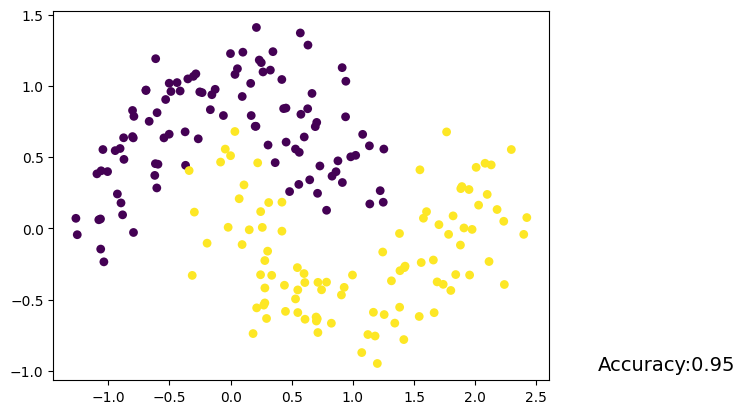

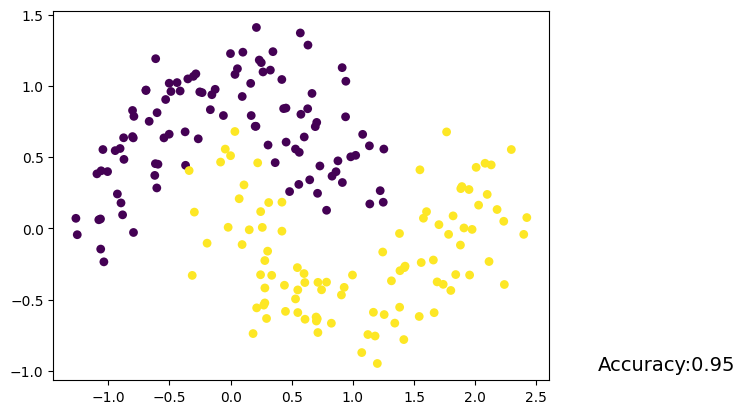

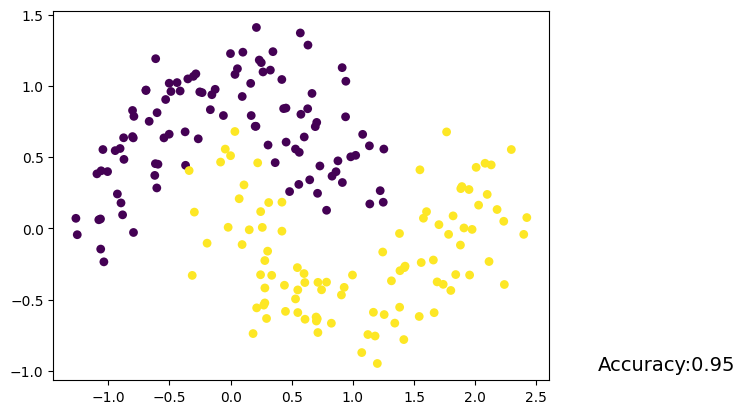

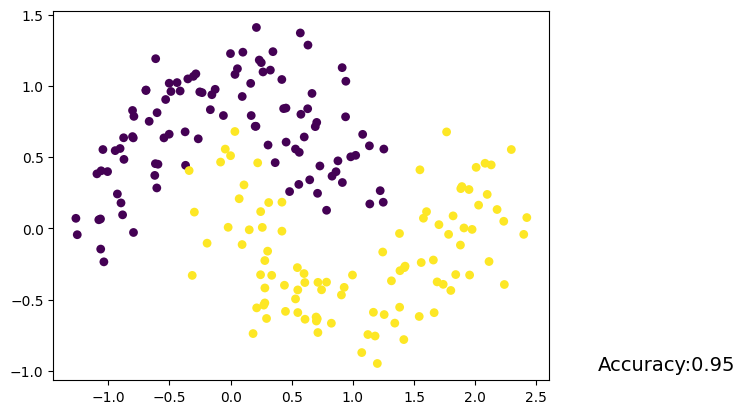

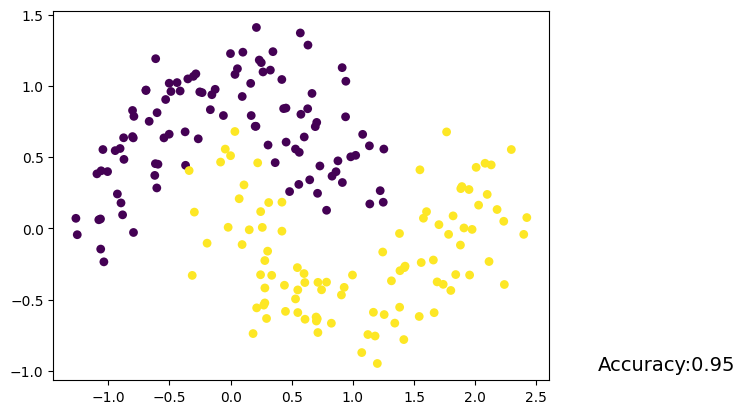

In [14]:
epochs = 200
for epoch in range(10000):
    #forward your input through the netword
    out = net.forward(x)
    #calculate loss by passing pred(out), and real data(y)
    loss = criterion(out,y)
    #back propagate but first clear out the gradient from previous iterations
    optimizer.zero_grad()
    loss.backward()
    #update weights
    optimizer.step()

    #visualize/plot the learning process ervry 1000 epochs
    if epoch% 1000 == 0:
        # show the learning process up untill now
        max_value,prediction = torch.max(out,1)
        prediction = prediction.data.numpy()
        actual_val = y.data.numpy()
        accuracy = sum(prediction == actual_val)/len(actual_val)
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],s=40,c=prediction,lw = 0)
        plt.text(3,-1,f"Accuracy:{accuracy:.2f}",fontdict ={'size':14})
        plt.pause(0.1)
plt.show()


